In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_avg(time,quant,time_a,quant_a):
    plt.plot(time[:,0],quant[:,0],color='r',alpha=rep_alpha,linewidth=.8,label='Simulation')
    plt.plot(time[:,1:],quant[:,1:],color='r',alpha=rep_alpha,linewidth=.8,label='_Simulation')
    plt.plot(np.mean(time,axis=1),np.mean(quant,axis=1),color='g',label='Simulation mean')
    plt.plot(time_a,quant_a,color='b',linewidth=2,label='Theory')
    
def moving_average(a, n=100):
    ret = np.cumsum(a, axis=0, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
r = np.load("_data/hires_sim_comp_res.npz")

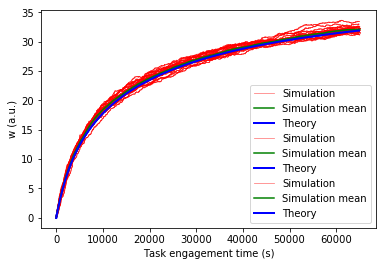

In [6]:
# Plot w results

rep_alpha = .5

plt.plot(r['time'][:,0],r['w_history'][:,0],color='r',alpha=rep_alpha,linewidth=.8,label='Simulation')
plt.plot(r['time'][:,1:],r['w_history'][:,1:],color='r',alpha=rep_alpha,linewidth=.8,label='_Simulation')
plt.plot(np.mean(r['time'],axis=1),np.mean(r['w_history'],axis=1),color='g',label='Simulation mean')
plt.plot(r['time_a'],r['w_a'],color='b',linewidth=2,label='Theory')
plt.xlabel('Task engagement time (s)')
plt.ylabel('w (a.u.)')
plt.legend(loc='lower right')
plt.savefig('_graphs_model/weight_dyn_comparison.pdf')
plt.show()

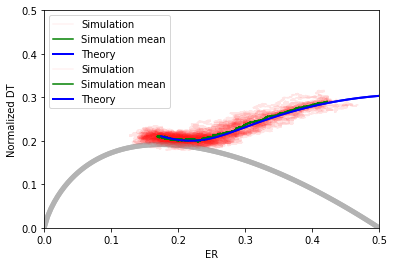

In [8]:
rep_alpha = .05

# Plot opc results
ER_vec = np.linspace(0.0001,.5-.0001,100)
Dnorm_opc = 1/(1/( ER_vec*np.log( (1-ER_vec)/ER_vec ) ) + 1/ (1 - 2*ER_vec) )
plt.plot(ER_vec,Dnorm_opc,color=(.7, .7, .7),linewidth=5)

window = 500
ER = moving_average(r['e_history'],window)
aDT = moving_average(r['DT'],window)

plt.plot(ER[:,0],aDT[:,0]/(r['D']+r['Dp']+r['T0']),color='r',alpha=rep_alpha,label='Simulation')
plt.plot(ER[:,1:],aDT[:,1:]/(r['D']+r['Dp']+r['T0']),color='r',alpha=rep_alpha,label='_Simulation')
plt.plot(np.mean(ER,axis=1),np.mean(aDT/(r['D']+r['Dp']+r['T0']),axis=1),color='g',label='Simulation mean')
plt.plot(r['ER_a'],r['DT_a']/(r['D']+r['Dp']+r['T0']),color='b',linewidth=2,label='Theory')
plt.xlim((0,.5))
plt.ylim((0,.5))

plt.xlabel('ER')
plt.ylabel('Normalized DT')
plt.legend(loc='upper left')
plt.savefig('_graphs_model/opc_dyn_comparison.pdf')
plt.show()

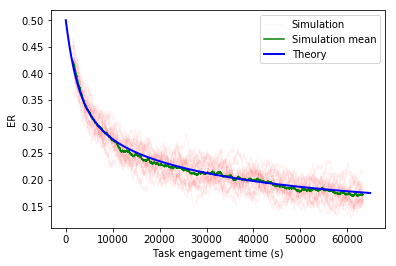

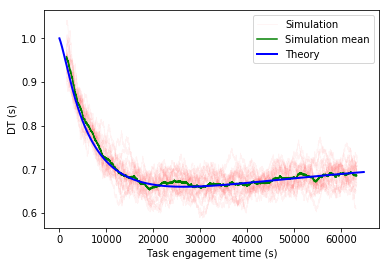

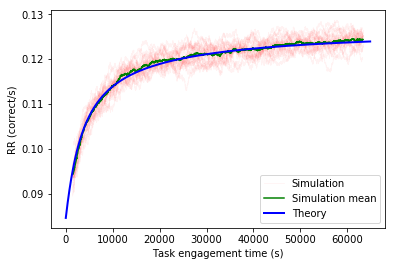

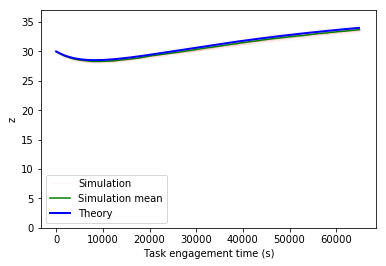

In [9]:

    
window = 500
atime = moving_average(r['time'],window) 
    
plot_avg(atime,ER,r['time_a'],r['ER_a'])
plt.xlabel('Task engagement time (s)')
plt.ylabel('ER')
plt.legend()
plt.savefig('_graphs_model/er_dyn_comparison.pdf')
plt.show()

plot_avg(atime,aDT,r['time_a'],r['DT_a'])
plt.xlabel('Task engagement time (s)')
plt.ylabel('DT (s)')
plt.legend()
plt.savefig('_graphs_model/dt_dyn_comparison.pdf')
plt.show()

plot_avg(atime,(1-ER)/moving_average(r['TT'],window),r['time_a'],r['RR_a'])
plt.xlabel('Task engagement time (s)')
plt.ylabel('RR (correct/s)')
plt.legend()
plt.savefig('_graphs_model/rr_dyn_comparison.pdf')
plt.show()

plot_avg(r['time'],r['z'][:-1,:],r['time_a'],r['z_a'])
plt.xlabel('Task engagement time (s)')
plt.ylabel('z')
plt.ylim((0,37))
plt.legend()
plt.savefig('_graphs_model/z_dyn_comparison.pdf')
plt.show()
